In [2]:
!pip install pandas

In [35]:
!pip install seaborn

In [52]:
!pip install sklearn

  Using cached threadpoolctl-2.1.0-py3-none-any.whl (12 kB)
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1320 sha256=1b0cb6b0e0e4eae08487837584d160cae1a48fe25f162902b9a14a2ee70bd63c
  Stored in directory: c:\users\anil's pc\appdata\local\pip\cache\wheels\46\ef\c3\157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn


In [3]:
import pandas as pd

In [19]:
#reading the csv file
car_data=pd.read_csv('car data.csv')
print(car_data.shape)
car_data.head()

(301, 9)


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [20]:
#check for any duplicates rows and remove them 
print("before duplicates removal shape:",car_data.shape)
car_data.drop_duplicates(inplace=True)
print("after duplicates removal shape:",car_data.shape)

before duplicates removal shape: (301, 9)
after duplicates removal shape: (299, 9)


In [21]:
#Check for any missing values and remove them if present
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [22]:
car_data['Year_Present']=2020
print(car_data.shape)
car_data.head()

(299, 10)


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Year_Present
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020


In [23]:
#Add New features
car_data['Num_Years']=car_data['Year_Present']-car_data['Year']
print(car_data.shape)
car_data.head()

(299, 11)


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Year_Present,Num_Years
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [25]:
#drop features
car_data=car_data.drop(['Car_Name','Year','Year_Present'],axis=1)
print(car_data.shape)
car_data.head()

(299, 8)


,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Num_Years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [29]:
print(car_data['Fuel_Type'].unique())
print(car_data['Seller_Type'].unique())
print(car_data['Transmission'].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']


Observation:
1. It is observed that all the cars are having fuel type as petrol/diesel/cng.
2. It is observed that data contains cars with both automatic and manual transmission.
3. Here both Dealer and Individual have participated in selling cars.

In [33]:
#converting categorical features to one hot encoded columns, using pd.dummies.
car_data=pd.get_dummies(car_data,drop_first=True)
print(car_data.shape)
car_data.head()

(299, 9)


,Selling_Price,Present_Price,Kms_Driven,Owner,Num_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
car_data.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Num_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.876378,0.028566,-0.087880,-0.234369,0.543541,-0.531636,-0.553851,-0.348869
Present_Price,0.876378,1.000000,0.205253,0.009947,0.053563,0.464849,-0.456746,-0.511686,-0.334265
Kms_Driven,0.028566,0.205253,1.000000,0.089367,0.525714,0.173295,-0.173595,-0.101030,-0.163881
Owner,-0.087880,0.009947,0.089367,1.000000,0.181639,-0.051836,0.054102,0.123646,-0.052166
Num_Years,-0.234369,0.053563,0.525714,0.181639,1.000000,-0.056469,0.052197,0.036820,-0.003434
Fuel_Type_Diesel,0.543541,0.464849,0.173295,-0.051836,-0.056469,1.000000,-0.979104,-0.345882,-0.086264
Fuel_Type_Petrol,-0.531636,-0.456746,-0.173595,0.054102,0.052197,-0.979104,1.000000,0.353865,0.078700
Seller_Type_Individual,-0.553851,-0.511686,-0.101030,0.123646,0.036820,-0.345882,0.353865,1.000000,0.058669
Transmission_Manual,-0.348869,-0.334265,-0.163881,-0.052166,-0.003434,-0.086264,0.078700,0.058669,1.000000


In [46]:
#Checking correlation
car_data.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Num_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.876378,0.028566,-0.087880,-0.234369,0.543541,-0.531636,-0.553851,-0.348869
Present_Price,0.876378,1.000000,0.205253,0.009947,0.053563,0.464849,-0.456746,-0.511686,-0.334265
Kms_Driven,0.028566,0.205253,1.000000,0.089367,0.525714,0.173295,-0.173595,-0.101030,-0.163881
Owner,-0.087880,0.009947,0.089367,1.000000,0.181639,-0.051836,0.054102,0.123646,-0.052166
Num_Years,-0.234369,0.053563,0.525714,0.181639,1.000000,-0.056469,0.052197,0.036820,-0.003434
Fuel_Type_Diesel,0.543541,0.464849,0.173295,-0.051836,-0.056469,1.000000,-0.979104,-0.345882,-0.086264
Fuel_Type_Petrol,-0.531636,-0.456746,-0.173595,0.054102,0.052197,-0.979104,1.000000,0.353865,0.078700
Seller_Type_Individual,-0.553851,-0.511686,-0.101030,0.123646,0.036820,-0.345882,0.353865,1.000000,0.058669
Transmission_Manual,-0.348869,-0.334265,-0.163881,-0.052166,-0.003434,-0.086264,0.078700,0.058669,1.000000


<AxesSubplot:>

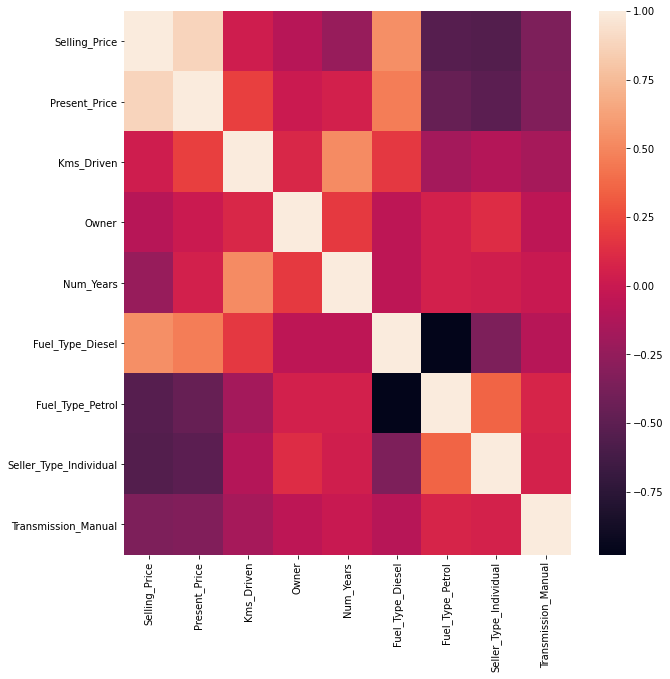

In [44]:
#plotting heatmap of correlation coefficients
plt.figure(figsize=(10,10))
sns.heatmap(car_data.corr())

In [ ]:
X=car_data.drop('Selling_Price',axis=1)
Y=car_data['Selling_Price']

<BarContainer object of 8 artists>

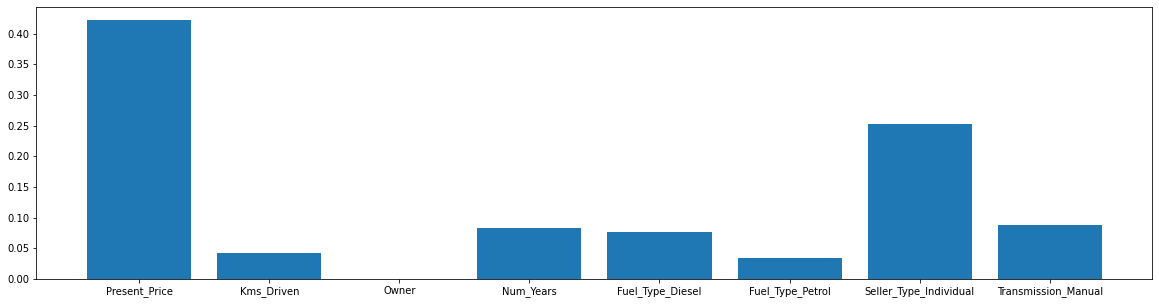

In [82]:
#checking feature importance
from sklearn.ensemble import ExtraTreesRegressor

rf=ExtraTreesRegressor()
rf.fit(X,Y)

feature_imp=rf.feature_importances_
features=X.columns
plt.figure(figsize=(20,5))
plt.bar(features,feature_imp)

In [53]:
from sklearn.model_selection import train_test_split

In [55]:
#Splitting data into train and test
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2, random_state=42)

print(X_train.shape,Y_train.shape,)
print(X_test.shape,Y_test.shape,)

(239, 8) (239,)
(60, 8) (60,)


In [158]:
X_train

,Present_Price,Kms_Driven,Owner,Num_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
6,8.12,18796,0,5,0,1,0,1
185,0.58,1900,0,12,0,1,1,0
187,0.51,32000,0,7,0,1,1,1
148,0.94,45000,0,10,0,1,1,1
31,4.89,54200,0,9,0,1,0,1
...,...,...,...,...,...,...,...,...
190,0.75,60000,0,12,0,1,1,1
72,18.61,56001,0,7,0,1,0,1
108,1.50,18000,0,4,0,1,1,1
272,10.00,27600,0,5,0,1,0,1


# Train the Model

In [147]:
from sklearn.metrics import make_scorer,mean_squared_error
def mse(y_true,y_pred):    
    score = mean_squared_error(y_true,y_pred)
    return score


def two_scorer():
    return make_scorer(mse, greater_is_better=False) 

In [153]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
rf=RandomForestRegressor()
params={'n_estimators':[int(x) for x in np.linspace(100,1500,15)],
        'max_depth':[int(x) for x in np.linspace(10,100,10)],
        'max_features':['auto','sqrt','log'],
        'min_samples_split':[2,5,10,15,100],
        'min_samples_leaf':[1,2,5,10]
}
rand_rf=RandomizedSearchCV(rf,params,n_iter=10,verbose=3,n_jobs=-1)
rand_rf.fit(X_train,Y_train)

print('Best Parameters obtained from RamdomSearchCV is:',rand_rf.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   58.5s finished


Best Parameters obtained from RamdomSearchCV is: {'n_estimators': 1300, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20}


In [154]:
from sklearn.metrics import r2_score
rf=RandomForestRegressor(n_estimators=1300,max_depth=20,max_features='sqrt',min_samples_split=10,min_samples_leaf=2)
rf.fit(X_train,Y_train)
y_train_pred=rf.predict(X_train)
y_test_pred=rf.predict(X_test)
print("train r2_score is : ",r2_score(Y_train.values,y_train_pred))
print("test r2_score is : ",r2_score(Y_test.values,y_test_pred))

train r2_score is :  0.8770201265159461
test r2_score is :  0.7101013807510361


In [157]:
import pickle
pickle.dump((rf),open('Rand_Forest_Regression_Model.pkl','wb')) #for dump

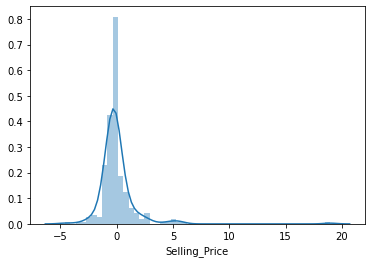

<AxesSubplot:xlabel='Selling_Price'>

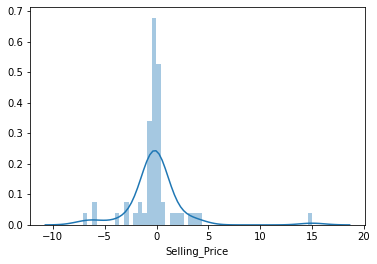

In [155]:
sns.distplot(Y_train-y_train_pred)
plt.show()
sns.distplot(Y_test-y_test_pred)

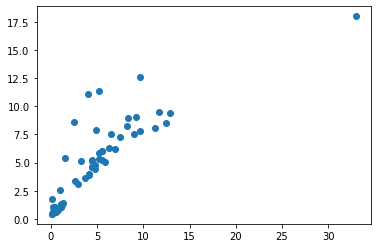

In [156]:
plt.scatter(Y_test,y_test_pred)

In [168]:
X_train.iloc[0]

Present_Price                 8.12
Kms_Driven                18796.00
Owner                         0.00
Num_Years                     5.00
Fuel_Type_Diesel              0.00
Fuel_Type_Petrol              1.00
Seller_Type_Individual        0.00
Transmission_Manual           1.00
Name: 6, dtype: float64

In [161]:
Y_train.iloc[0]

6.75

In [167]:
rf.predict(X_train.iloc[0].values.reshape(1,-1))

array([6.32022855])